**Install Libraries**

In [ ]:
!pip install transformers Pillow

**Import Libraries**

In [ ]:
from transformers import pipeline
from IPython.display import HTML, display, Markdown
from PIL import Image
import base64
import io

def image_to_base64(image):
    """Convert PIL Image to base64."""
    buffered = io.BytesIO()
    image.save(buffered, format='JPEG')
    return base64.b64encode(buffered.getvalue()).decode()

def show_report(image):
    """Displays photo alongside bold highlighted story."""
    img_html = f'<img src="data:image/jpeg;base64,{image_to_base64(image)}" style="width:250px;height:auto;margin-right:20px;float:left;" />'
    story_html = f'<span style="font-size: 16px; color: #000">{story}</span>'
    display(HTML(f'<div>{img_html}</div>'))

**Upload your photo**

In [ ]:
image = Image.open("/content/OIP.jpg")
image.show()

**Transform caption into a story**

In [ ]:
caption_pipeline = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

In [ ]:
story_pipeline = pipeline("text2text-generation", model="google/flan-t5-large")

**Generated story: A woman in a dress stands in a forest.**


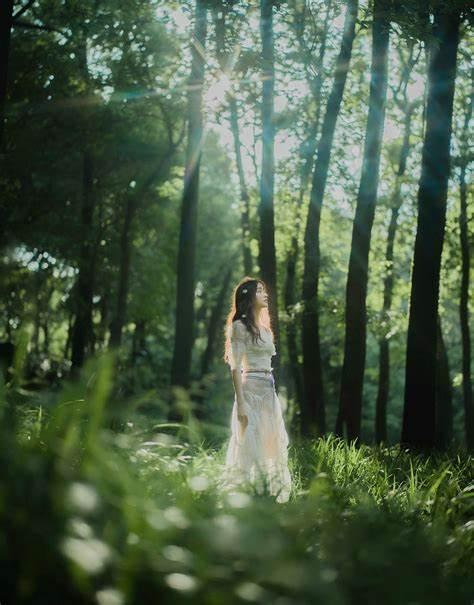

In [16]:
caption = caption_pipeline(image)[0]['generated_text']

prompt = f"Write a short story based on this description: {caption}"

story = story_pipeline(prompt, max_new_tokens=100)[0]['generated_text']
#bold_highlight(f"Generated story: {story}")
display(Markdown(f"**Generated story: {story}**"))
show_report(image)